[[ 0.866 -0.5    0.     5.   ]
 [ 0.5    0.866  0.     3.   ]
 [ 0.     0.     1.     2.   ]
 [ 0.     0.     0.     1.   ]]
[[ 0.866 -0.5    0.   ]
 [ 0.5    0.866  0.   ]
 [ 0.     0.     1.   ]]
[5.232 6.598 3.   ]


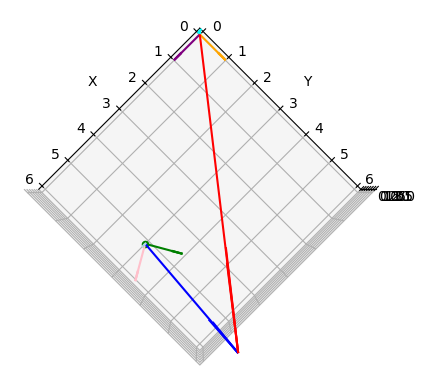

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def coordinate_transformation_matrix(origin, X, Y, Z):
    rotation_matrix = np.array([X, Y, Z]).T
    translation_vector = np.array(origin).reshape(3, 1)
    transformation_matrix = np.eye(4)
    transformation_matrix[:3, :3] = rotation_matrix
    transformation_matrix[:3, 3] = translation_vector.flatten()
    
    print(transformation_matrix)
    print(rotation_matrix)
    return transformation_matrix

def position_to_world_coordinate(vector, origin, X, Y, Z):
   # X=np.append(X,1.0)
   # Y=np.append(Y,1.0)
   # Z=np.append(Z,1.0)
    rotation_matrix = np.array([X, Y, Z]).T
    #inverse_rotation_matrix = rotation_matrix.T
    inverse_rotation_matrix=coordinate_transformation_matrix(origin, X, Y, Z)
    vector=np.append(vector,1)
    transformed_vector = inverse_rotation_matrix @ vector
    return transformed_vector[:3]
    
def rotate_vector_to_world_coordinate(vector, X, Y, Z):
    rotated_vector = np.array([X, Y, Z]).T@vector
    return rotated_vector

def plot_transformed_vectors(vector, transformed_vector, origin, X, Y, Z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    #plot vector on 2nd system (merely rotating)
    vector = np.array([X, Y, Z]).T@vector
    ax.quiver(*origin, *vector, color='blue', label='Original Vector in 2nd System')
    # Plot the vector in the second system (blue) and its transformed version in the first system (red)
    ax.quiver(0, 0, 0, *transformed_vector, color='red', label='Transformed Vector in 1st System')
    
    # Plot basis vectors of the first coordinate system at the origin (0, 0, 0)
    ax.quiver(0, 0, 0, 1, 0, 0, color='purple', label='X-axis of 1st System')
    ax.quiver(0, 0, 0, 0, 1, 0, color='orange', label='Y-axis of 1st System')
    ax.quiver(0, 0, 0, 0, 0, 1, color='cyan', label='Z-axis of 1st System')

    # Plot basis vectors of the second coordinate system at its origin
    ax.quiver(*origin, *X, color='pink', label='X-axis of 2nd System')
    ax.quiver(*origin, *Y, color='green', label='Y-axis of 2nd System')
    ax.quiver(*origin, *Z, color='lightblue', label='Z-axis of 2nd System')
    
    # Plot the origin of the second coordinate system
    ax.scatter(*origin, color='green', marker='o', label='Origin of 2nd System')
    
    # Set labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    ax.set_xlim([0,6])
    ax.set_ylim([0,6])
    ax.set_zlim([0,3])
    # Add legend
    #ax.legend()

    # Set the view
    ax.view_init(elev=90, azim=45)  # Elevation of 30 degrees and azimuth of 45 degrees

    # Display plot
    plt.show()

# Example data
origin = [5, 3, 2]  # Origin of the second coordinate system in the first system
X = [0.866, 0.5, 0]  # X-axis in the second system
Y = [-0.5, 0.866, 0]  # Y-axis in the second system
Z = [0, 0, 1]         # Z-axis in the second system
vector_in_second_system = np.array([2, 3, 1])  # Vector in the second coordinate system


# Transform the vector to the first coordinate system
transformed_vector = position_to_world_coordinate(vector_in_second_system, origin, X, Y, Z)
print(transformed_vector)
# Plot the original and transformed vectors along with basis vectors
plot_transformed_vectors(vector_in_second_system, transformed_vector, origin, X, Y, Z)